# RSE Group Leaders Survey 2023

In [4]:
import sys
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../src/data/')
import util as util

# set the backend for all figures 
plt.rcParams['figure.facecolor'] = 'white'

In [5]:
setup, dset, dset_gnames = util.read_setup_and_data()
validated = util.validate_setup_and_data(setup, dset)
dset = util.rename_groups(dset, dset_gnames)

if not validated:
    print("ERROR: setup and data files are not valid.")
    raise KeyboardInterrupt

# number of respondents and questions
nrsps_raw = dset.shape[0]
nqsts = dset.shape[1]

# replace dset columns with setup keys
dset.columns = setup.keys()

# remove respondents who did not agree to share data
dset = dset[dset.q1 == "Yes"]
nrsps = dset.shape[0]

# process checkbox responses
dset = util.process_checkboxes(dset, setup)

# save the processed dataset
util.save_data(dset)

# print out some information
print(f"Questions  : {nqsts}")
print(f"Respondents - all           : {nrsps_raw}")
print(f"Respondents - agreed sharing: {nrsps}")


Questions  : 20
Respondents - all           : 36
Respondents - agreed sharing: 36


## Overview of the answers


Q4: Is your group

                                                                                      count  percentage
The main RSE Group for the university/research organisation                              26          72
An RSE Group for a specific subset/group within the university/research organisation      8          22
An RSE Group for multiple universities/research organisations                             4          11


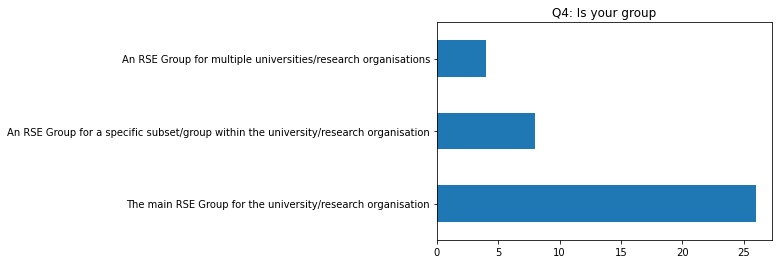

Q6: In what year was your group founded?


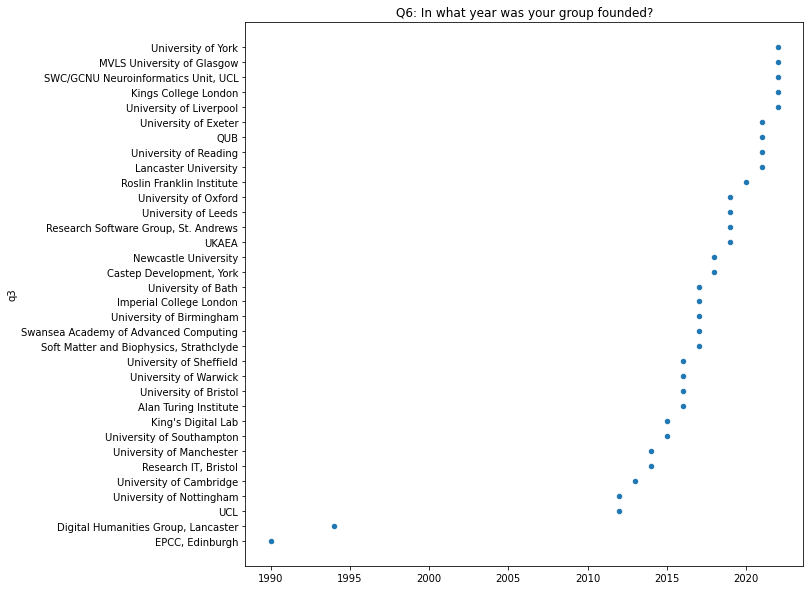


Q7: Where is your group based?

                                                    count  percentage
IT/Research IT                                         13          38
Other                                                   8          24
Academic Department - supporting whole Institution      5          15
Academic Department - supporting a specific domain      4          12
Independent Institute/Facility                          4          12


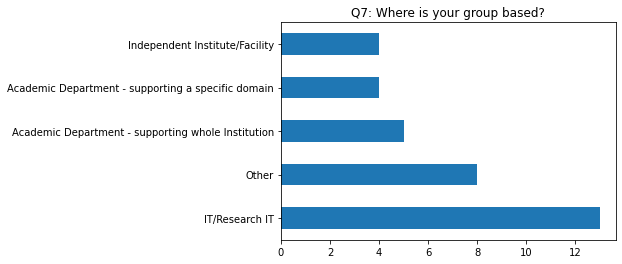

Q8: How many people were in your group when it started?


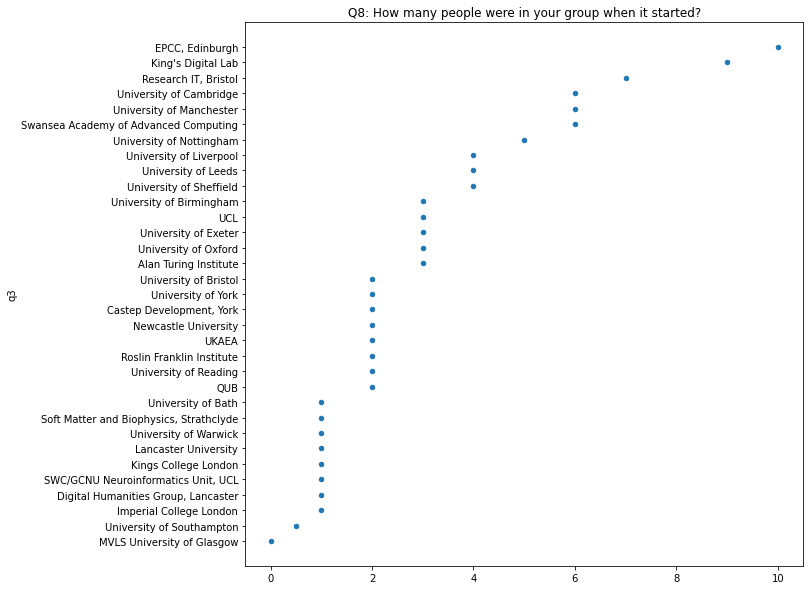

Q9: How many people are currently in your group in total?


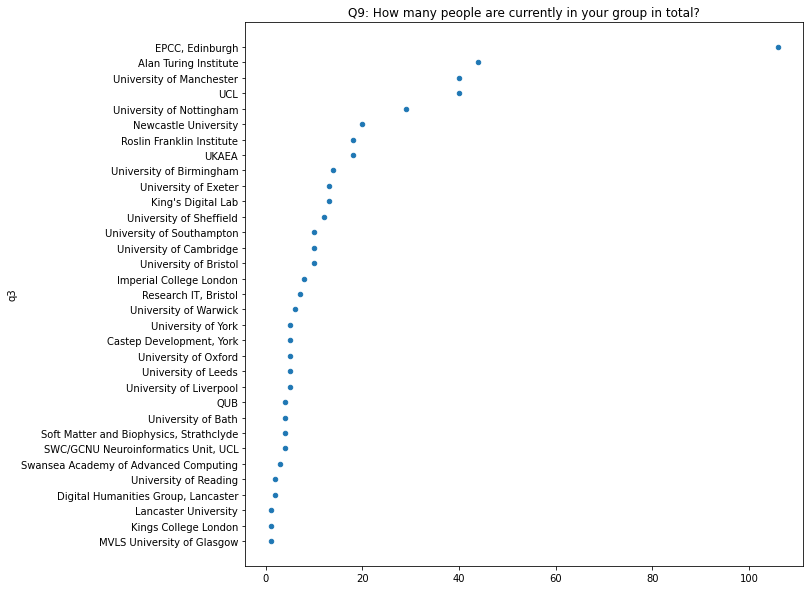

Q10: How many people in your group are in a more senior role than a standard RSE (i.e. typically receiving greater pay than a postdoctoral researcher)?


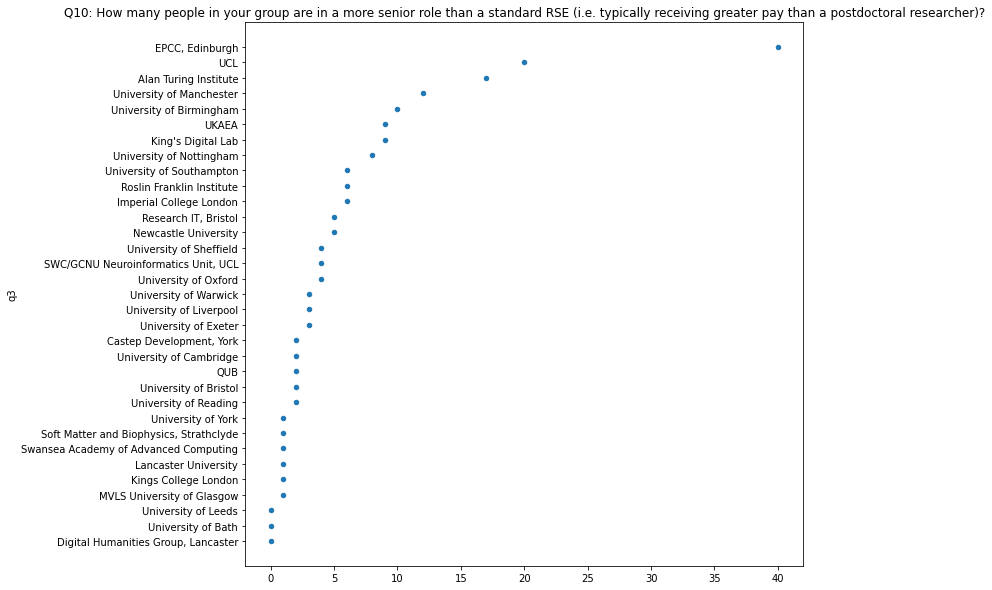

Q11: How many people in your group are in a less senior role than a standard RSE (e.g. a junior RSE)?


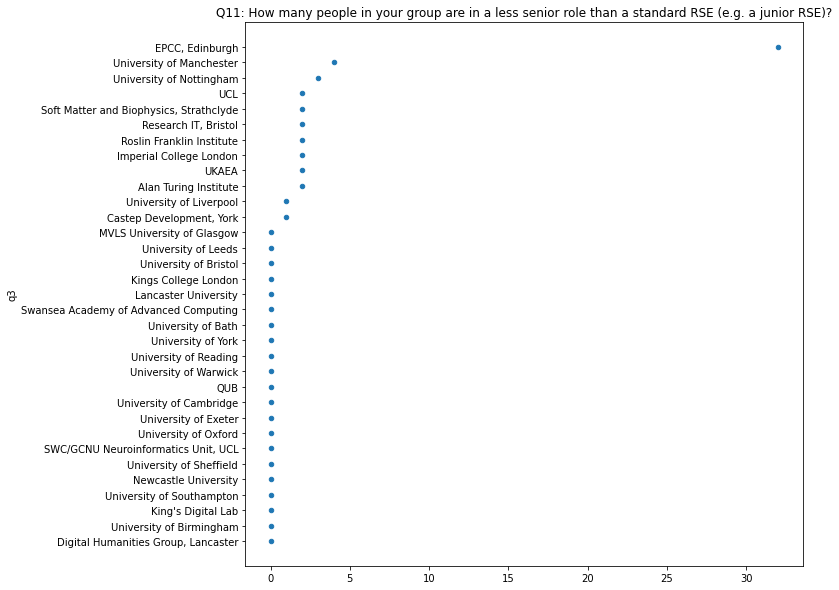

Q12: How many staff have left your group in the last two years?


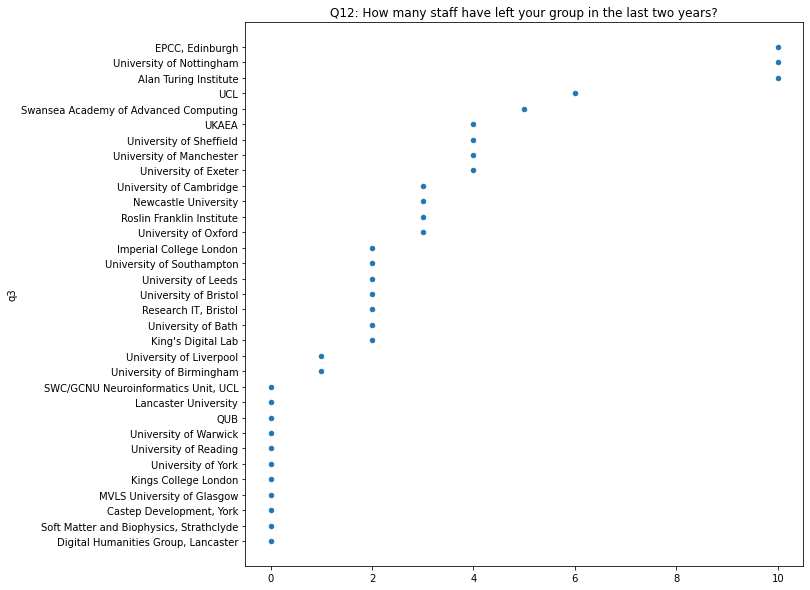

Q14: How many new RSEs positions have been added to your group in the last two years?


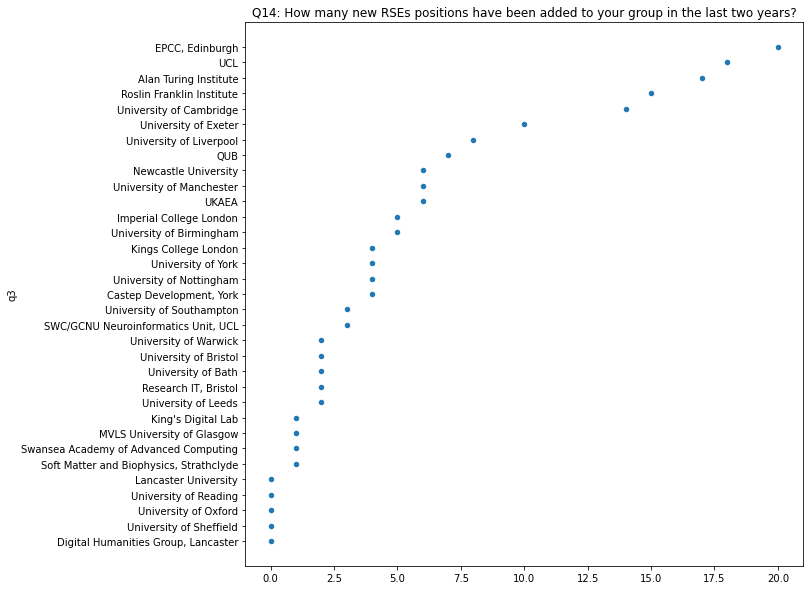


Q15: Please rate the level of demand for your Group's services

                                                      count  percentage
Demand greater than the number of RSEs                   16          48
Demand significantly greater than the number of RSEs     13          39
Demand is met by the number of RSEs                       4          12
Demand is less than the number of RSEs                    0           0
Demand is significantly less than the number of RSEs      0           0


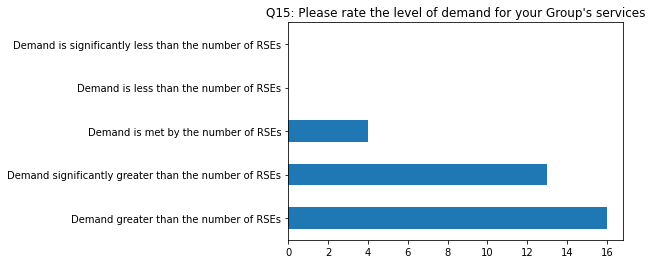


Q16: If demand for your services outstrips the number of RSEs, what causes this situation?

                                                                                                                 count  percentage
Hiring processes are long-winded, so we're always behind the demand curve                                           20          61
We lack the funding to make new positions available                                                                 11          33
We can attract RSEs, but can't hire them because the salary and other benefits we can offer are not competitive      9          27
We have funding, but we can't find RSEs to hire                                                                      7          21


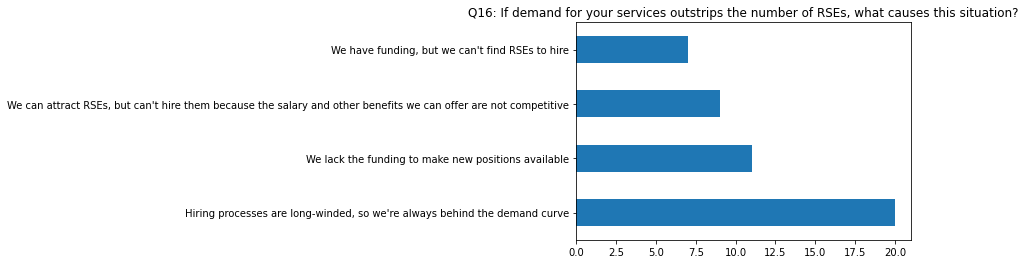

In [6]:
for qst in setup.keys():
    title = f"{qst.upper()}: {setup[qst]['text'].replace(':', '')}"
    if setup[qst]['type'] == 'checkbox':
        dset_stats = util.derive_checkbox_stats(dset, setup, qst)
        # print and plot the stats   
        print(f"\n{title}\n")
        pd.set_option('precision', 0)
        print(dset_stats.to_string())
        dset_stats.plot.barh(y='count', 
                                legend=False, 
                                title=title
                                )
        plt.show()
    elif setup[qst]['type'] == 'number':
        print(title)    
        # order by the qst column
        dset = dset.sort_values(by=qst)
        # plot the a scatter plot of the qst column versus the name column excluding the nan
        dset = dset.dropna(subset=[qst])

        dset.plot.scatter(x=qst, 
                          y='q3', 
                          xlabel="",
                          title=title)
        # exclude the nan from the scater plot
        
        # set the height of the figure to 10
        plt.gcf().set_size_inches(10, 10)
        plt.show()
    